<a href="https://colab.research.google.com/github/tavi1402/Data_Science_bootcamp/blob/main/3_3_2_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with CATEGORICAL data in Pandas:


Pandas is the defacto toolbox for Python data scientists to ease the data analysis process. You can use it before you start analyzing, to collect, explore, and format the data. Pandas makes these steps a breeze via its numerous I/O and handy data manipulation functions.

**During Data analysis**, you must have encountered non-numeric datatypes mainly dates and some repetitive values called categorical datatypes.

**In this tutorial**, you’ll learn the common tricks to handle **'categorical'** type of data and preprocess it to build machine learning models with them.

### Prerequisites:
- You should be familiar with Pandas data structures. Here's a [notebook](https://jovian.ai/aakashns/python-pandas-data-analysis) by Aakash NS for pandas from the very start.
- You can find help with running this notebook online using this helper [notebook](https://jovian.ml/aakashns/05-cifar10-cnn/v/51&cellId=2).


## Loading Datasets into colab:
I have used opendatsets, which is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

Steps involved in using opendatasets:

* Mention the url of the dataset into a variable lets say, url_variable.
* Import the dataset library after installing it.
- Use `od.download(url_variable)`
- Colab will ask for kaggle username and key which you can find on your kaggle profile.
- Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
- Click on Create New API Token - It will download kaggle.json file on your machine. (which contains the required information to download the dataset on your colaboratory)

So the dataset I have used for this tutorial contains about 4 million rows and 49 columns. This dataset is about accidents happening in the United States. For this tutorial let's just consider a sample of this data.  

More information on the dataset I have used in this tutorial can be found [here](https://smoosavi.org/datasets/us_accidents).Or you can directly download the dataset from [kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents).

Well, that reduced our dataset to One-tenth of its size.

Lets begin with what are categorical datatypes:
#  Categorical Datatypes:

Categorical features can only take on a limited, and usually a fixed number of possible values. For example, in our dataset, i.e related to the number of accidents occurring in the US, typical columns for categorical data will be, accident location, timezone, airport_codes...etc. These are nominal features, where there is no order associated with categories. When there is order associated with them, they are called ordinal features. (eg.. small, medium, large)

Few reasons why categorical values can be difficult to deal with are:
- High cardinality (Features with a large number of levels)

- Algebraic Machine Learning models, whose input must be numerical. (Hence categorical must be transformed into numbers before applying a learning algorithm to them)
- It is difficult for an ML model to differentiate between highly different levels. For example, for an ML model, New York, New Jersey, and New Delhi are just three different levels.


Hence we are challenged to figure out how we can turn these text values into numerical types for further processing and unmask information hidden among these features.

Let's start with gathering information about our dataset:



The columns with `object` datatype are possible categorical features in our dataset. But you cannot wholly rely on `.info`, so its important that you investigate your raw dataset thouroughly and then clean it.



Visually exploring the data is one of the best ways to extract information between variables which shall be our next step.
But when it comes to categorical data, plotting the boxplot is the best way **to analyse the relationship between a continous and a categorical value**.
Let's first start with some basic plots, then talk a little about boxplots.

One Exploratory Data Analysis step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()` method.


This graph depicts the state that has the highest number of accidents, which we can see is CA - California.
We can get the same information with the help matplotlib's pie chart.
Note that the above plot took up a total wall time of around 700 ms.


**Tip:** In Pandas, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using `.astype()` method on your columns as shown below:

You can validate operations on the `category dtype` by timing the execution time of few data retrieving operations on this dataframe with columns as `category` dtype and even as `object` dtype with the `%%time` magic command in the cells below to compare the time taken in both cases.




You will notice that operations on dataframe with the `category` dtype will be much faster.

## Handling Missing Data/Null Values,  
Handling Missing Data/Null Values is one of the most important data pre-processing steps. It is a huge problem for data analysis because it misshapes our results. It’s difficult to be fully confident in the insights when you know that some entries are missing values.  

Below I have mentioned a few ways to **Handle missing values in Categorical Columns.**  I have used only a few columns of our entire dataframe to understand these methods.

The number of categories in each column with missing values:


### 1. Frequent Categorical Imputation:

This is a method in which we **assume** that there is random order of missing values(MAR - Missing at Random) and there's a majority of these missing values.

Under this approach we replace the missing values with the most common class, Hence the first step is to find out which category occurred most in each category using `mode()`.
* [The mode of a set of values is the value that appears most often]

The next step is to replace all NAN values in that column with that category

Now you can see that there has been an addition of imputed columns that have zero null values, while the original columns continue to hold those null values which we will drop in our last step.

The Last step is to Drop our original columns and keep the newly imputed ones.

This is a very simple and one of the most basic approaches to handle missing values in our categorical columns, yet not a preferred one.
* This can distort the relation of the most frequent class and,
* Predictions may become biased due to columns that have max number of null values.

So lets have a look at other ways to do the same and more efficiently.


### 2. Adding a variable to capture NaN:
We use this approach without considering any assumptions, hence can be implemented on all kinds of categorical columns.

In this approach, we replace the NAN categories with the most occurred values but in this case, we add a new feature to introduce some weight/importance to the non-imputed and imputed columns. Let's define our dataframe again,

The first step is to create a new column and replace 1 if our feature value is NAN else 0. This column is an important column to the imputed category.  

Next, we replace NAN value with the most occurred category in the actual column.


Again this method too has some disadvantages like,
* Creating additional columns can cause Curse of Dimentionality.
* For the Imputed Column to have value, Potentially misunderstood data & the number of missing data should be large enough.

### 3. Create a new Category for NAN Values:

Another approach to handling missing values is a very straightforward one. Again this approach can be applied to all categorical columns since we do not consider any assumptions. It has a very simple implementation. We create a new category, lets call it 'the Random Category' for all missing values.

I will replace NAN values with a new name, I have used the name "Unknown" here.


This approach preserves the variance of our data. But if the missing data is more, we will land up creating only more random data. Hence this approach doesn't give us good results when there is a high percentage of missing data.

#### Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded into numbers before we can use it to fit and evaluate a model. So another important step while dealing with categorical data is to encode our classes.  


# Encoding categorical data:

I'll continue to work with a small part of the entire data frame to understand these encoding techniques. I'll use the 2nd technique I mentioned to handle null values from it first and let us see what our final dataframe looks like.

Since we will only be looking at encoding techniques, I dont think we require these importance columns, so for now we can drop these imputed columns.  

### 1. Replacing Values:

This is one of the most basic approaches and very straightforward to implement. We can just replace the categories with the desired numbers by putting them all together. This can easily be done with the `replace()` function in pandas. The idea is that we have the liberty to choose whatever numbers we want to assign to the categories according to the business use case.

We first create a dictionary that will contain mapping numbers(i.e the replacement) for the categories in our category column.

  I will apply this encoding technique to the `'Timezone'` column of our dataframe:

The reason I have picked up the `Timezone` column is because it has a lower  number of categories. Which is why mapping is possible via a hard coded dictionary. When category count is high, typing out each mapping is not possible, which is why we cant use this technique with several categories.


You can see the `Timezone` column encoded as the mapped numbers in the dataframe above.

### 2. Label Encoding:

Another approach to encode categorical data is to convert each value in the column into a number. We use this encoding technique when the categorical feature is ordinal, i.e like I mentioned above, ordered categories. Hence encoding should reflect the sequence.

In Label encoding, each label is converted into an integer value and these integers are always between 0 and num_categories-1.
One way of achieving this is by using pandas `cat.codes` on our categorical column.


Here's the different numerical equivalents of the categories in `Timezone` column using label encoder.

You can also achieve this with the help of `scikit-learn`'s - `LabelEncoder` or `category_encoders`:

You can see the column `State` has numeric encoded values equal to the number of categories.  

### 3. One Hot Encoding:

This encoding technique is used when the features are nominal i.e do not have any order. For example in this dataset, the column `Airport_Codes` is categorical but we cant arrange them in a sequence.

In one hot encoding, for each level of a categorical feature, we create a new variable. In simple terms, each category is converted into a new column. Then, each category is mapped with a binary variable containing either 0 or 1, where 0 represents the absence and 1 represents the presence of that category.
These newly created binary features/columns are called **Dummy Variables** and are = no. of categories in a column.

The simplest way to use this encoding tactic is by using `pandas` `.get_dummies()` method.  This function takes 3 arguments: dataframe, columns to perform encoding on, and lastly, the `prefix` argument that will allow us to specify the prefix for the new columns that will be created.



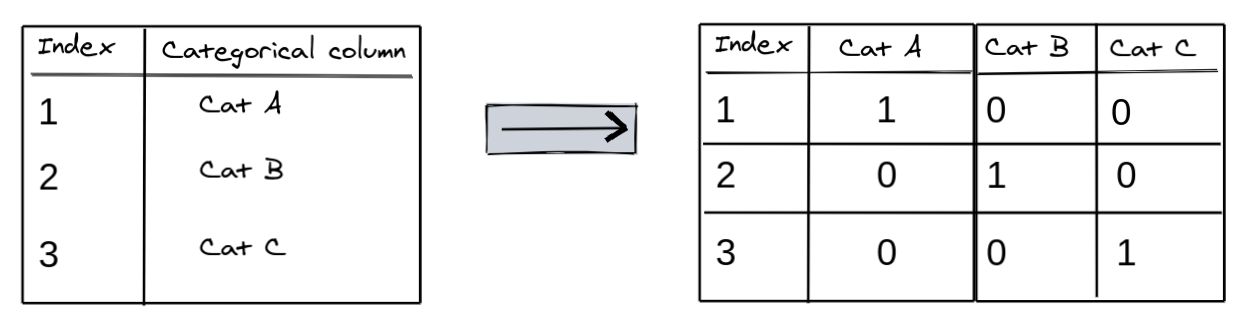

You can even achieve one-hot encoding by directly creating a function as per our understanding of the concept of one-hot encoding.

As you can see, for the column `Source`:

after encoding, in the second table(in both techniques), we have dummy variables each representing a category in the feature `Source`. Now for each category that is present, we have 1 in the column of that category and 0 for the others.

The same can be achieved using `scikit-learn`'s `LabelBinarizer` and `OneHotEncoder` or even with `category_encoders`:
Below I have implemented category_encoders's `.OneHotEncoder` method.

While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in the formation of as many new columns, which can result in the curse of dimensionality.

The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

### 4. Binary Encoding:

This is a combination of one-hot encoding and Hash encoding! In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder (each unique category value is assigned an integer value eg, red-"1", blue-"2"). Then the numbers are transformed into a binary number. After that binary value is split into different columns. This results in fewer columns compared to one-hot encoding.

Binary encoding works well when there are a high number of categories. For example, the `City` column in our dataset.  

You must wonder why don't we stop after the ordinal encoding part itself, or why is a need for having to convert them into their binary equivalent only to further make columns. Here's one reason why,
- When our categorical column is not ordinal, and the number of categories is numerous, we can not apply only Label Encoding, as that will lead to poor decision-making of our model. Unlike the case of ordinal columns. Having one-fourth of the total number of categories as columns in the dataframe can help in better decision-making of our model.  

Once again I have used the `category_encoders` library and its `.BinaryEncoder` function to achieve this.

Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.

- **Note** that `category_encoders` is a very useful library for encoding categorical columns. Not only does it support one-hot, binary, and label encoding, but also other advanced encoding methods like Helmert contrast, polynomial contrast, backward difference, etc.

## Further Reading:

- [Other encoding techniques with category_encoder](https://contrib.scikit-learn.org/category_encoders/)

- [Categorical data with big data using pyspark](https://towardsdatascience.com/feature-encoding-with-spark-2-3-0-part-1-9ede45562740)

- [More on Categorical_encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)